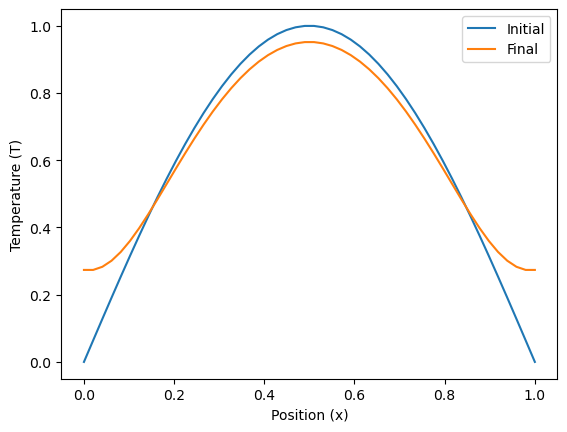

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0       # Length of the rod
T = 0.5       # Total time
Nx = 50       # Number of spatial points
Nt = 1000     # Number of time steps
alpha = 0.01  # Thermal diffusivity

# Discretization
dx = L / (Nx - 1)        # Spatial step size
dt = T / Nt              # Time step size
x = np.linspace(0, L, Nx) # Spatial grid

# Stability parameter (alpha * dt / dx^2)
r = alpha * dt / dx**2

# Initial temperature distribution
T_init = np.sin(np.pi * x)  # Example initial condition
T = T_init.copy()           # Temperature array

# Applied heat term (P applied) - Can be zero if not needed
P = np.zeros(Nx)

# Boundary conditions (Neumann: insulated boundaries)
def apply_neumann_boundary(T):
    T[0] = T[1]  # dT/dx = 0 at the left boundary
    T[-1] = T[-2]  # dT/dx = 0 at the right boundary

# Crank-Nicholson method
def crank_nicholson(T, P, r, Nt, Nx):
    # Coefficient matrix for Crank-Nicholson
    A = np.zeros((Nx, Nx))
    B = np.zeros((Nx, Nx))
    
    for i in range(1, Nx-1):
        A[i, i-1] = -r/2
        A[i, i] = 1 + r
        A[i, i+1] = -r/2
        B[i, i-1] = r/2
        B[i, i] = 1 - r
        B[i, i+1] = r/2
    
    # For Neumann boundary conditions
    A[0, 0] = A[-1, -1] = 1 + r
    A[0, 1] = A[-1, -2] = -r
    B[0, 0] = B[-1, -1] = 1 - r
    B[0, 1] = B[-1, -2] = r
    
    for n in range(Nt):
        # Right-hand side (B @ T + dt * P)
        RHS = B @ T + dt * P
        # Solve the system A * T_next = RHS
        T_next = np.linalg.solve(A, RHS)
        # Apply Neumann boundary conditions
        apply_neumann_boundary(T_next)
        # Update the temperature
        T = T_next
    
    return T

# Time evolution
T_final = crank_nicholson(T, P, r, Nt, Nx)

# Plotting the result
plt.plot(x, T_init, label='Initial')
plt.plot(x, T_final, label='Final')
plt.xlabel('Position (x)')
plt.ylabel('Temperature (T)')
plt.legend()
plt.show()